In [3]:
import os, sys
sys.path.append(os.path.join(os.path.expanduser("~"),"CLEOPE/Trials/modules"))
import qm
import data_processing_S2_affine as dp
import rasterio.plot

In [4]:
import datetime
import pandas as pd

In [5]:
import xarray as xr
import rioxarray
import numpy as np

In [6]:
import data_S2 as dp2

In [7]:
files = dp2.queryS2('product_list_202001-local.txt') #load local file

In [60]:
#print(files)

['/home/jupyter-juser03/CLEOPE/local_files/S2A_MSIL2A_20200101T105441_N0213_R051_T31TDG_20200101T121106.SAFE', '/home/jupyter-juser03/CLEOPE/local_files/S2B_MSIL2A_20200106T105339_N0213_R051_T31TDG_20200106T121433.SAFE', '/home/jupyter-juser03/CLEOPE/local_files/S2A_MSIL2A_20200108T104421_N0213_R008_T31TDG_20200108T120710.SAFE', '/home/jupyter-juser03/CLEOPE/local_files/S2A_MSIL2A_20200111T105421_N0213_R051_T31TDG_20200111T121352.SAFE', '/home/jupyter-juser03/CLEOPE/local_files/S2B_MSIL2A_20200113T104309_N0213_R008_T31TDG_20200113T124940.SAFE', '/home/jupyter-juser03/CLEOPE/local_files/S2B_MSIL2A_20200116T105309_N0213_R051_T31TDG_20200116T122813.SAFE']


In [17]:
def paths_to_datetimeindex2(paths):
    string_slice=(7,-12) #string_slice=(45,60)
    date_strings = [os.path.basename(i)[slice(*string_slice)]
                    for i in paths]
    return pd.to_datetime(date_strings)

In [18]:
nirlist= []
redlist= []

for file in files:
    #filelist.append(file)
    nir= dp.bands(file,res='10m')[4]#b8
    red= dp.bands(file,res='10m')[3]
    nirlist.append(nir)
    redlist.append(red)
    #files_b.append(dp.bands(file,res='10m')[4])
time_var = xr.Variable('time', paths_to_datetimeindex2(redlist))
print(time_var)

<xarray.Variable (time: 6)>
array(['2020-01-01T10:54:41.000000000', '2020-01-06T10:53:39.000000000',
       '2020-01-08T10:44:21.000000000', '2020-01-11T10:54:21.000000000',
       '2020-01-13T10:43:09.000000000', '2020-01-16T10:53:09.000000000'],
      dtype='datetime64[ns]')


In [101]:
nir_da_gran =  xr.concat([xr.open_rasterio(i,chunks={'x':512, 'y':512}) for i in nirlist],   #
                        dim=time_var)

In [102]:
nir_da_gran

,Array,Chunk
Bytes,1.45 GB,524.29 kB
Shape,"(6, 1, 10980, 10980)","(1, 1, 512, 512)"
Count,8718 Tasks,2904 Chunks
Type,uint16,numpy.ndarray


In [25]:
dx = 2
dy = 3

In [104]:
mask_lon_nir = (nir_da_gran.x >= (429770-dx)) & (nir_da_gran.x <= (433953+dx))   
mask_lat_nir = (nir_da_gran.y >= (4666780-dy)) & (nir_da_gran.y <= (4672292+dy))  

In [105]:
nir_da = nir_da_gran.where(mask_lon_nir & mask_lat_nir, drop=True)

In [106]:
new_nir_da = xr.DataArray(nir_da,dims=nir_da.dims,attrs= nir_da.attrs.copy())
new_nir_da

<xarray.DataArray (time: 6, band: 1, y: 552, x: 419)>
array([[[[ 488.,  380.,  357., ..., 1620., 1594., 1754.],
         [ 312.,  302.,  354., ..., 1376., 1440., 1580.],
         [ 304.,  604.,  800., ..., 1288., 1294., 1444.],
         ...,
         [3122., 2996., 2706., ..., 1650., 1504., 1378.],
         [2938., 2732., 2024., ..., 1076., 1015.,  974.],
         [2568., 2170., 1340., ..., 1170., 1194., 1196.]]],


       [[[1528., 1212.,  998., ..., 1514., 1542., 1500.],
         [ 655.,  518.,  424., ..., 1492., 1478., 1714.],
         [ 367.,  313.,  355., ..., 1350., 1400., 1582.],
         ...,
         [3230., 3168., 3082., ..., 1744., 1676., 1566.],
         [3262., 3052., 2994., ..., 1698., 1620., 1470.],
         [3188., 2990., 2452., ..., 1212., 1222., 1204.]]],


       [[[1715., 1257., 1194., ...,  814.,  845.,  935.],
         [ 966.,  449.,  377., ...,  767.,  788., 1049.],
...
         [3260., 3108., 2922., ..., 1604., 1534., 1412.],
         [3120., 2920., 2170., ..., 1032., 1001., 1040.]]],


       [[[2850., 2776., 2730., ..., 2802., 2844., 2814.],
         [2626., 2552., 2508., ..., 2850., 2800., 2978.],
         [2530., 2498., 2508., ..., 2730., 2710., 2790.],
         ...,
         [3698., 3694., 3664., ..., 2248., 2172., 2102.],
         [3698., 3630., 3584., ..., 2200., 2134., 2060.],
         [3608., 3598., 3462., ..., 2030., 1942., 1960.]]],


       [[[1572., 1338., 1124., ..., 1656., 1610., 1624.],
         [ 861.,  568.,  515., ..., 1494., 1502., 1786.],
         [ 456.,  396.,  413., ..., 1448., 1454., 1644.],
         ...,
         [3216., 3144., 3162., ..., 1732., 1724., 1646.],
         [3254., 3104., 3072., ..., 1714., 1666., 1542.],
         [3140., 3044., 2612., ..., 1306., 1300., 1298.]]]])
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Attributes:
    transform:   (10.0, 0.0, 399960.0, 0.0, -10.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (10.0, 10.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [108]:
nir_ds = new_nir_da.to_dataset('band')
nir_ds = nir_ds.rename({1: 'nir'})
nir_ds

<xarray.Dataset>
Dimensions:  (time: 6, x: 419, y: 552)
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Data variables:
    nir      (time, y, x) float64 488.0 380.0 357.0 ... 1.3e+03 1.298e+03
Attributes:
    transform:   (10.0, 0.0, 399960.0, 0.0, -10.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (10.0, 10.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [109]:
red_da_gran = xr.concat([xr.open_rasterio(i,chunks={'x':512, 'y':512}) for i in redlist],    #
                        dim=time_var)
red_da_gran

,Array,Chunk
Bytes,1.45 GB,524.29 kB
Shape,"(6, 1, 10980, 10980)","(1, 1, 512, 512)"
Count,8718 Tasks,2904 Chunks
Type,uint16,numpy.ndarray


In [110]:
mask_lon_red = (red_da_gran.x >= (429770-dx)) & (red_da_gran.x <= (433953+dx))   
mask_lat_red = (red_da_gran.y >= (4666780-dy)) & (red_da_gran.y <= (4672292+dy))

In [112]:
red_da = red_da_gran.where(mask_lon_red & mask_lat_red, drop=True)

In [114]:
new_red_ds = xr.DataArray(red_da,dims=red_da.dims,attrs= red_da.attrs.copy())
new_red_ds

<xarray.DataArray (time: 6, band: 1, y: 552, x: 419)>
array([[[[8.500e+01, 5.100e+01, 3.000e+01, ..., 4.880e+02, 6.340e+02,
          6.920e+02],
         [1.100e+01, 2.200e+01, 2.200e+01, ..., 4.980e+02, 5.540e+02,
          5.990e+02],
         [1.000e+00, 5.600e+01, 1.140e+02, ..., 4.400e+02, 4.660e+02,
          5.750e+02],
         ...,
         [6.280e+02, 6.590e+02, 6.010e+02, ..., 4.900e+02, 4.340e+02,
          4.260e+02],
         [5.440e+02, 5.640e+02, 4.470e+02, ..., 3.760e+02, 3.390e+02,
          3.200e+02],
         [5.360e+02, 4.750e+02, 3.230e+02, ..., 3.610e+02, 3.720e+02,
          4.300e+02]]],


       [[[3.700e+02, 2.350e+02, 1.800e+02, ..., 5.330e+02, 5.580e+02,
          5.850e+02],
         [1.140e+02, 5.400e+01, 3.300e+01, ..., 4.840e+02, 5.500e+02,
          7.300e+02],
         [2.000e+01, 1.000e+01, 2.000e+00, ..., 4.780e+02, 5.640e+02,
...
          1.296e+03],
         [2.170e+03, 2.144e+03, 2.140e+03, ..., 1.356e+03, 1.252e+03,
          1.252e+03],
         [2.114e+03, 2.138e+03, 2.102e+03, ..., 1.338e+03, 1.228e+03,
          1.240e+03]]],


       [[[3.940e+02, 2.880e+02, 2.200e+02, ..., 5.840e+02, 5.860e+02,
          6.430e+02],
         [1.350e+02, 1.050e+02, 8.300e+01, ..., 5.200e+02, 6.070e+02,
          7.030e+02],
         [7.000e+01, 6.200e+01, 5.200e+01, ..., 5.050e+02, 5.880e+02,
          6.710e+02],
         ...,
         [8.070e+02, 8.080e+02, 8.140e+02, ..., 6.060e+02, 5.770e+02,
          5.750e+02],
         [7.880e+02, 8.070e+02, 8.060e+02, ..., 5.940e+02, 4.990e+02,
          4.870e+02],
         [7.270e+02, 7.420e+02, 6.950e+02, ..., 5.010e+02, 4.210e+02,
          4.200e+02]]]])
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Attributes:
    transform:   (10.0, 0.0, 399960.0, 0.0, -10.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (10.0, 10.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [115]:
red_ds = new_red_ds.to_dataset('band')
red_ds = red_ds.rename({1: 'red'})
red_ds

<xarray.Dataset>
Dimensions:  (time: 6, x: 419, y: 552)
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Data variables:
    red      (time, y, x) float64 85.0 51.0 30.0 64.0 ... 501.0 421.0 420.0
Attributes:
    transform:   (10.0, 0.0, 399960.0, 0.0, -10.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (10.0, 10.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [12]:
scl = []
for file in files:
    scl_list = dp2.sclbands(file)[1]     
    #print(scl_list)
    scl.append(scl_list)

In [19]:
scl_da = xr.concat([xr.open_rasterio(i,chunks={'x':512, 'y':512}) for i in scl],  #
                        dim=time_var)
scl_da

<xarray.DataArray (time: 6, band: 1, y: 1830, x: 1830)>
dask.array<concatenate, shape=(6, 1, 1830, 1830), dtype=uint8, chunksize=(1, 1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.7e+06 4.7e+06 4.7e+06 ... 4.59e+06 4.59e+06 4.59e+06
  * x        (x) float64 4e+05 4.000e+05 4.001e+05 ... 5.097e+05 5.097e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [26]:
mask_lon_scl = (scl_da.x >= (429770-120-dx)) & (scl_da.x <= (433953+120+dx))   
mask_lat_scl = (scl_da.y >= (4666780-120-dy)) & (scl_da.y <= (4672292+120+dy))

In [27]:
scl_da = scl_da.where(mask_lon_scl & mask_lat_scl, drop=True)
scl_da

<xarray.DataArray (time: 6, band: 1, y: 96, x: 74)>
dask.array<where, shape=(6, 1, 96, 74), dtype=float64, chunksize=(1, 1, 52, 57), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.297e+05 4.298e+05 4.298e+05 ... 4.34e+05 4.341e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [22]:
new_scl_da = xr.DataArray(scl_da,dims=scl_da.dims,attrs= scl_da.attrs.copy())
new_scl_da

<xarray.DataArray (time: 6, band: 1, y: 1830, x: 1830)>
array([[[[ 5,  5,  4, ...,  0,  0,  0],
         [ 5,  5,  5, ...,  0,  0,  0],
         [ 5,  5,  5, ...,  0,  0,  0],
         ...,
         [ 4,  4,  4, ...,  0,  0,  0],
         [ 4,  4,  4, ...,  0,  0,  0],
         [ 4,  4,  4, ...,  0,  0,  0]]],


       [[[ 5,  5,  4, ...,  0,  0,  0],
         [ 5,  5,  5, ...,  0,  0,  0],
         [ 5,  4,  5, ...,  0,  0,  0],
         ...,
         [ 4,  4,  4, ...,  0,  0,  0],
         [ 4,  4,  4, ...,  0,  0,  0],
         [ 4,  4,  4, ...,  0,  0,  0]]],


       [[[ 5,  5,  4, ...,  2,  4,  4],
         [ 5,  5,  5, ...,  2,  4,  4],
...
         [ 4,  4,  4, ...,  0,  0,  0],
         [ 4,  4,  4, ...,  0,  0,  0]]],


       [[[ 8,  8,  8, ..., 10, 10, 10],
         [ 8,  8,  8, ..., 10, 10, 10],
         [ 8,  8,  8, ...,  8, 10, 10],
         ...,
         [10, 10, 10, ...,  6,  6,  6],
         [10, 10, 10, ...,  6,  6,  6],
         [ 4, 10, 10, ...,  6,  6,  6]]],


       [[[ 5,  5,  4, ...,  0,  0,  0],
         [ 5,  4,  5, ...,  0,  0,  0],
         [ 4,  4,  5, ...,  0,  0,  0],
         ...,
         [ 4,  4,  4, ...,  0,  0,  0],
         [ 4,  4,  4, ...,  0,  0,  0],
         [ 4,  4,  4, ...,  0,  0,  0]]]], dtype=uint8)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.7e+06 4.7e+06 4.7e+06 ... 4.59e+06 4.59e+06 4.59e+06
  * x        (x) float64 4e+05 4.000e+05 4.001e+05 ... 5.097e+05 5.097e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [128]:
#new_scl_da = new_scl_da.interp_like(red_ds, method='nearest') #.values[0,0,0]
new_scl_da = new_scl_da.interp(y=red_ds["y"], x=red_ds["x"], method='nearest')
new_scl_da

<xarray.DataArray (time: 6, band: 1, y: 552, x: 419)>
array([[[[4., 2., 2., ..., 4., 4., 4.],
         [4., 2., 2., ..., 4., 4., 4.],
         [4., 2., 2., ..., 4., 4., 4.],
         ...,
         [4., 4., 4., ..., 5., 5., 5.],
         [4., 2., 2., ..., 3., 3., 3.],
         [4., 2., 2., ..., 3., 3., 3.]]],


       [[[4., 2., 2., ..., 4., 4., 4.],
         [4., 2., 2., ..., 4., 4., 4.],
         [4., 2., 2., ..., 4., 4., 4.],
         ...,
         [4., 4., 4., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.]]],


       [[[4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
...
         [4., 3., 3., ..., 5., 5., 5.],
         [4., 3., 3., ..., 5., 5., 5.]]],


       [[[8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.],
         ...,
         [8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.]]],


       [[[4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
         ...,
         [4., 4., 4., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.]]]])
Coordinates:
  * band     (band) int64 1
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [129]:
scl_ds = new_scl_da.to_dataset('band')
scl_ds

<xarray.Dataset>
Dimensions:  (time: 6, x: 419, y: 552)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Data variables:
    1        (time, y, x) float64 4.0 2.0 2.0 2.0 2.0 ... 4.0 5.0 5.0 5.0 5.0
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [130]:
scl_ds = scl_ds.rename({1:'scl'})
#scl_ds = scl_ds.astype('int16')
scl_ds

<xarray.Dataset>
Dimensions:  (time: 6, x: 419, y: 552)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Data variables:
    scl      (time, y, x) float64 4.0 2.0 2.0 2.0 2.0 ... 4.0 5.0 5.0 5.0 5.0
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [131]:
ds=xr.merge([nir_ds,red_ds,scl_ds])   #, compat='no_conflicts', join='left')  #broadcast_equals  #exact indexes along dimension x are not equal
ds

<xarray.Dataset>
Dimensions:  (time: 6, x: 419, y: 552)
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Data variables:
    nir      (time, y, x) float64 488.0 380.0 357.0 ... 1.3e+03 1.298e+03
    red      (time, y, x) float64 85.0 51.0 30.0 64.0 ... 501.0 421.0 420.0
    scl      (time, y, x) float64 4.0 2.0 2.0 2.0 2.0 ... 4.0 5.0 5.0 5.0 5.0
Attributes:
    transform:   (10.0, 0.0, 399960.0, 0.0, -10.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (10.0, 10.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [132]:
#ds=xr.merge([nir_ds,red_ds,scl_ds_int])
#ds = ds.astype('int16')
#ds=xr.merge([nir_ds,red_ds,scl_ds])
#ds

In [133]:
ndvi=(ds['nir']-ds['red'])/(ds['nir']+ds['red'])
ndvi

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[0.70331588, 0.76334107, 0.84496124, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [0.93188854, 0.86419753, 0.88297872, ..., 0.46851654,
         0.444333  , 0.45020652],
        [0.99344262, 0.83030303, 0.75054705, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 , 0.65776699, 0.63820316, ..., 0.48209366,
         0.49926145, 0.50540958],
        [0.65463918, 0.64083176, 0.6115454 , ..., 0.5284128 ,
         0.52490421, 0.47109471]],

       [[0.61011591, 0.67519005, 0.69439728, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105, 0.81118881, 0.85557987, ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083, 0.9380805 , 0.98879552, ..., 0.47702407,
         0.42566191, 0.40935412],
...
        [0.25313453, 0.25903204, 0.25479452, ..., 0.25167038,
         0.24398625, 0.23719835],
        [0.26039536, 0.25736058, 0.25227114, ..., 0.23734533,
         0.26048435, 0.24396135],
        [0.26109752, 0.25453278, 0.24442847, ..., 0.20546318,
         0.22523659, 0.225     ]],

       [[0.59918616, 0.64575646, 0.67261905, ..., 0.47857143,
         0.46630237, 0.43273048],
        [0.72891566, 0.68796434, 0.72240803, ..., 0.4836147 ,
         0.42437174, 0.4351145 ],
        [0.7338403 , 0.72925764, 0.77634409, ..., 0.4828469 ,
         0.42409403, 0.42030238],
        ...,
        [0.59880686, 0.59109312, 0.59054326, ..., 0.48160821,
         0.49847892, 0.48221522],
        [0.61009401, 0.58731782, 0.58432182, ..., 0.48526863,
         0.53903002, 0.51996057],
        [0.62399793, 0.60802958, 0.57967947, ..., 0.44548976,
         0.51074956, 0.51105937]]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09

In [138]:
scl = ds['scl']
good_data = scl.where((scl == 4) | (scl == 5) | (scl == 6))
#good_data
ndvi_no_cloud = ndvi.where(good_data>=0)
ndvi_no_cloud

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[0.70331588,        nan,        nan, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [0.93188854,        nan,        nan, ..., 0.46851654,
         0.444333  , 0.45020652],
        [0.99344262,        nan,        nan, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.65463918,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.61011591,        nan,        nan, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105,        nan,        nan, ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083,        nan,        nan, ..., 0.47702407,
         0.42566191, 0.40935412],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.59918616,        nan,        nan, ..., 0.47857143,
         0.46630237, 0.43273048],
        [0.72891566,        nan,        nan, ..., 0.4836147 ,
         0.42437174, 0.4351145 ],
        [0.7338403 ,        nan,        nan, ..., 0.4828469 ,
         0.42409403, 0.42030238],
        ...,
        [0.59880686, 0.59109312, 0.59054326, ..., 0.48160821,
         0.49847892, 0.48221522],
        [0.61009401,        nan,        nan, ..., 0.48526863,
         0.53903002, 0.51996057],
        [0.62399793,        nan,        nan, ..., 0.44548976,
         0.51074956, 0.51105937]]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09

In [50]:
ndvi_no_cloud.values

array([[[0.70331588,        nan,        nan, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [0.93188854,        nan,        nan, ..., 0.46851654,
         0.444333  , 0.45020652],
        [0.99344262,        nan,        nan, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.65463918,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.61011591,        nan,        nan, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105,        nan,        nan, ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083,        nan,        nan, ..., 0.47702407,
         0.42566191, 0.40935412],
        ...,
        [0.61985958, 0.62211982, 0.60062321, ..., 0.49892566,
         0.4799117 , 0.47805569],
        [0.6

In [51]:
ndvi_no_cloud.isel(time=0)

<xarray.DataArray (y: 552, x: 419)>
array([[0.70331588,        nan,        nan, ..., 0.5370019 , 0.43087971,
        0.43417825],
       [0.93188854,        nan,        nan, ..., 0.46851654, 0.444333  ,
        0.45020652],
       [0.99344262,        nan,        nan, ..., 0.49074074, 0.47045455,
        0.43041109],
       ...,
       [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607, 0.55211558,
        0.52771619],
       [0.6875359 ,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.65463918,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
    time     datetime64[ns] 2020-01-01T10:54:41

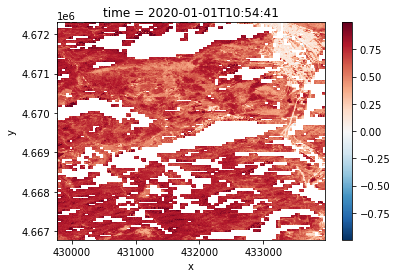

In [52]:
ndvi_no_cloud.isel(time=0).plot()

In [54]:
#ndvi_sth=ndvi_no_cloud.rolling(time=5, min_periods=1, center=True).mean()
ndvi_sth=ndvi_no_cloud.rolling(time=1, min_periods=1, center=True).mean()
#ndvi_sth=ndvi_no_cloud.rolling(time=5, min_periods=1, center=True).mean()
ndvi_sth

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[0.70331588,        nan,        nan, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [0.93188854,        nan,        nan, ..., 0.46851654,
         0.444333  , 0.45020652],
        [0.99344262,        nan,        nan, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.65463918,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.61011591,        nan,        nan, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105,        nan,        nan, ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083,        nan,        nan, ..., 0.47702407,
         0.42566191, 0.40935412],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.59918616,        nan,        nan, ..., 0.47857143,
         0.46630237, 0.43273048],
        [0.72891566,        nan,        nan, ..., 0.4836147 ,
         0.42437174, 0.4351145 ],
        [0.7338403 ,        nan,        nan, ..., 0.4828469 ,
         0.42409403, 0.42030238],
        ...,
        [0.59880686, 0.59109312, 0.59054326, ..., 0.48160821,
         0.49847892, 0.48221522],
        [0.61009401,        nan,        nan, ..., 0.48526863,
         0.53903002, 0.51996057],
        [0.62399793,        nan,        nan, ..., 0.44548976,
         0.51074956, 0.51105937]]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09

In [55]:
y=np.squeeze(ndvi_sth.values)
y

array([[[0.70331588,        nan,        nan, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [0.93188854,        nan,        nan, ..., 0.46851654,
         0.444333  , 0.45020652],
        [0.99344262,        nan,        nan, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.65463918,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.61011591,        nan,        nan, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105,        nan,        nan, ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083,        nan,        nan, ..., 0.47702407,
         0.42566191, 0.40935412],
        ...,
        [0.61985958, 0.62211982, 0.60062321, ..., 0.49892566,
         0.4799117 , 0.47805569],
        [0.6

In [56]:
ndvi_sth.coords

Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09

In [57]:
x=ndvi_sth.coords['time'].values
x

array(['2020-01-01T10:54:41.000000000', '2020-01-06T10:53:39.000000000',
       '2020-01-08T10:44:21.000000000', '2020-01-11T10:54:21.000000000',
       '2020-01-13T10:43:09.000000000', '2020-01-16T10:53:09.000000000'],
      dtype='datetime64[ns]')

In [28]:
#ndvi_sth.mean(dim=['x', 'y']).plot(size=6)

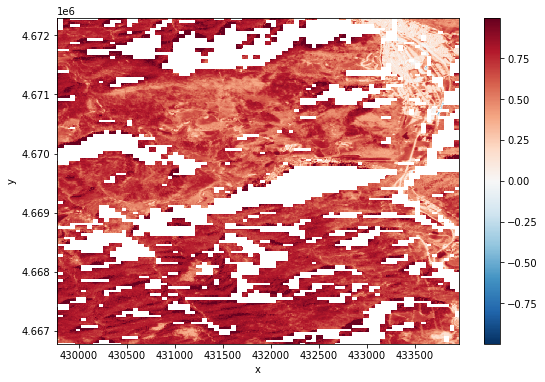

In [123]:
ndvi_sth.mean(dim=['time']).plot(size=6)

In [124]:
mask = ndvi_sth.isnull()
#mask
ndvi_cl = ndvi_sth.where(~mask, other=0)
ndvi_cl

<xarray.DataArray (time: 1, y: 552, x: 419)>
array([[[0.61011591, 0.        , 0.        , ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105, 0.        , 0.        , ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083, 0.        , 0.        , ..., 0.47702407,
         0.42566191, 0.40935412],
        ...,
        [0.61985958, 0.62211982, 0.60062321, ..., 0.49892566,
         0.4799117 , 0.47805569],
        [0.63878423, 0.        , 0.        , ..., 0.53526221,
         0.54359219, 0.5408805 ],
        [0.66084918, 0.        , 0.        , ..., 0.45498199,
         0.5275    , 0.48917749]]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-06T10:53:39

In [125]:
#ndvi_cl[0].rio.to_raster("ndvicl.tif")

vPOS = Value at peak of season:

In [127]:
ndvi_cl.max("time").values

array([[0.61011591, 0.        , 0.        , ..., 0.47923791, 0.46857143,
        0.43884892],
       [0.70351105, 0.        , 0.        , ..., 0.51012146, 0.45759369,
        0.40261866],
       [0.89664083, 0.        , 0.        , ..., 0.47702407, 0.42566191,
        0.40935412],
       ...,
       [0.61985958, 0.62211982, 0.60062321, ..., 0.49892566, 0.4799117 ,
        0.47805569],
       [0.63878423, 0.        , 0.        , ..., 0.53526221, 0.54359219,
        0.5408805 ],
       [0.66084918, 0.        , 0.        , ..., 0.45498199, 0.5275    ,
        0.48917749]])

POS = DOY of peak of season

In [128]:
#ndvi_cl.isel(time=ndvi_cl.argmax("time")).time.dt.dayofyear.values

In [129]:
computed_ndvi_cl = ndvi_cl.load()
type(computed_ndvi_cl.data)
computed_ndvi_cl
ndvi_cl.isel(time=computed_ndvi_cl.argmax("time")).time.dt.dayofyear.values

array([[6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       ...,
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6]])

Trough = Minimum value

In [130]:
ndvi_cl.min("time").values

array([[0.61011591, 0.        , 0.        , ..., 0.47923791, 0.46857143,
        0.43884892],
       [0.70351105, 0.        , 0.        , ..., 0.51012146, 0.45759369,
        0.40261866],
       [0.89664083, 0.        , 0.        , ..., 0.47702407, 0.42566191,
        0.40935412],
       ...,
       [0.61985958, 0.62211982, 0.60062321, ..., 0.49892566, 0.4799117 ,
        0.47805569],
       [0.63878423, 0.        , 0.        , ..., 0.53526221, 0.54359219,
        0.5408805 ],
       [0.66084918, 0.        , 0.        , ..., 0.45498199, 0.5275    ,
        0.48917749]])

AOS = Amplitude of season

In [135]:
ndvi_cl.max("time")-ndvi_cl.min("time").values

<xarray.DataArray (y: 552, x: 419)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05

vSOS = Value at the start of season

In [136]:
# select timesteps before peak of season (AKA greening)
greenup = ndvi_cl.where(ndvi_cl.time < ndvi_cl.isel(time=ndvi_cl.argmax("time")).time)
# find the first order slopes
green_deriv = greenup.differentiate("time")
# find where the first order slope is postive
pos_green_deriv = green_deriv.where(green_deriv > 0)
# positive slopes on greening side
pos_greenup = greenup.where(pos_green_deriv)
pos_greenup

IndexError: index 0 is out of bounds for axis 0 with size 0

In [137]:
# find the median
median = pos_greenup.median("time")
median

NameError: name 'pos_greenup' is not defined

In [134]:
# distance of values from median
distance = pos_greenup - median
distance


NameError: name 'pos_greenup' is not defined

In [ ]:
def allNaN_arg(da, dim, stat):
    """
    Calculate da.argmax() or da.argmin() while handling
    all-NaN slices. Fills all-NaN locations with an
    float and then masks the offending cells.
    Params
    ------
    xarr : xarray.DataArray
    dim : str, 
            Dimension over which to calculate argmax, argmin e.g. 'time'
    stat : str,
        The statistic to calculte, either 'min' for argmin()
        or 'max' for .argmax()
    Returns
    ------
    xarray.DataArray
    """
    # generate a mask where entire axis along dimension is NaN
    mask = da.isnull().all(dim)

    if stat == "max":
        y = da.fillna(float(da.min() - 1))
        y = y.argmax(dim=dim, skipna=True).where(~mask)
        return y

    if stat == "min":
        y = da.fillna(float(da.max() + 1))
        y = y.argmin(dim=dim, skipna=True).where(~mask)
        return y


In [40]:
# find index (argmin) where distance is most negative
idx = allNaN_arg(distance, "time", "min").astype("int16")
idx

NameError: name 'allNaN_arg' is not defined

In [ ]:
# find index (argmin) where distance is smallest absolute value
idx = allNaN_arg(xr.ufuncs.fabs(distance), "time", "min").astype("int16")
idx.values

SOS = DOY for start of season

In [ ]:
ndvi_cl.coords['time'].values[idx.values[0][0]]